# Reco Process

In [54]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from web import Recommender
reco = Recommender(_id="62542f4bf08938dfe3be9fdd")

1 round : ECV 24.98%
2 round : ECV 48.14%
3 round : ECV 52.23%
4 round : ECV 53.91%
5 round : ECV 54.77%
6 round : ECV 55.02%
7 round : ECV 55.33%
8 round : ECV 55.36%
9 round : ECV 55.37%
10 round : ECV 55.37%
11 round : ECV 55.37%
12 round : ECV 55.37%
13 round : ECV 55.37%
14 round : ECV 55.37%
15 round : ECV 55.37%
[56.89260112 55.0110501  57.16720896 55.48846072 57.3427851  55.37315119]
Clustering End. ECV 57.34278510118532 data Select
Save Okay 625440a3b576bfa608b0b928


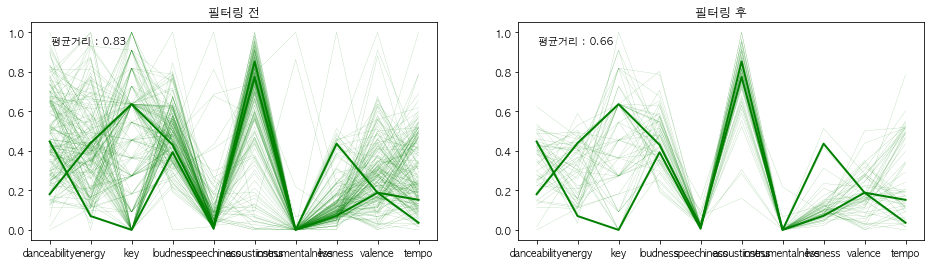

In [4]:
reco.init_setting()
reco.data_preprocessing()
reco.norm_features.head()
reco.reco_kmeans()
reco.visual_filtering()
reco.save()
reco.end()

## Dataset Researching
- 장르 다양하게

In [6]:
import pandas as pd
import numpy as np
import requests as req
from urllib.parse import urlencode
from web import Spotify

spotify = Spotify(None)
token = spotify.token

In [32]:
# Get Toplist Playlists
pop = "pop"
hiphop ="hiphop"
indie = "indie_alt"
mood = "mood"

url = "https://api.spotify.com/v1/browse/categories/{}/playlists".format(indie)
query = {
    "country": "KR"
}
query = urlencode(query)
headers = {
    "authorization": "Bearer {}".format(token)
}

res = req.get("{}?{}".format(url, query), headers=headers)
res = res.json()

In [68]:
# 국내외 가장 핫한 노래들을 만나보세요! (커버: BIGBANG(빅뱅)) Total : 50
target_1_url = "https://api.spotify.com/v1/playlists/37i9dQZF1DWT9uTRZAYj0c/tracks"

# 지금 국내에서 떠오르고 있는 팝 음악을 만나보세요! (커버: Charlie Puth) Total : 50
target_2_url = "https://api.spotify.com/v1/playlists/37i9dQZF1DWVuUd3Ffrcx8/tracks"

# TrenChill K-Hip Hop Total : 100
target_3_url = "https://api.spotify.com/v1/playlists/37i9dQZF1DWWvmOXYvR5a6/tracks"

# K-Pop Acoustic Total : 52
target_4_url = "https://api.spotify.com/v1/playlists/37i9dQZF1DX1wdZM1FEz79/tracks"

targets = [target_1_url, target_2_url, target_3_url, target_4_url]

In [70]:
playlist_query = {
    "fields": "items(track(album(artists, images), id, name))"
}
playlist_query = urlencode(playlist_query)

responses = list()

for target in targets:
    res = req.get("{}?{}".format(target, playlist_query), headers=headers)
    responses.append(res.json())

In [76]:
df = pd.DataFrame(columns=['trackId', 'trackName',
                            'artistIds', 'artistNames', 'image'])

for res in responses:
    for r in res['items']:
        r = r['track']
        _trackId = r['id']
        _trackName = r['name']

        album = r['album']
        artists = album['artists']

        images = album['images']
        _image = images[0] if len(images) >= 1 else ""

        _artistIds = ""
        _artistNames = ""
        for artist in artists:
            _artistIds += "{},".format(artist['id'])
            _artistNames += "{},".format(artist['name'])

        df = df.append({
            "trackId": _trackId,
            "trackName": _trackName,
            "artistIds": _artistIds[:-1],
            "artistNames": _artistNames[:-1],
            "image": _image
        }, ignore_index=True)
    
# 중복 트랙 제거
df.drop_duplicates('trackId', inplace=True)
df.head()

,trackId,trackName,artistIds,artistNames,image
0,3TSLqZssCoCdDlMhCJ08XW,Still Life,4Kxlr1PRlDKEB0ekOCyHgX,BIGBANG,"{'height': 640, 'url': 'https://i.scdn.co/imag..."
1,2oBMZYteeO8DyXV9gDx6Za,Feel My Rhythm,1z4g3DjTBBZKhvAroFlhOM,Red Velvet,"{'height': 640, 'url': 'https://i.scdn.co/imag..."
2,0IGUXY4JbK18bu9oD4mPIm,TOMBOY,2AfmfGFbe0A0WsTYm0SDTx,(G)I-DLE,"{'height': 640, 'url': 'https://i.scdn.co/imag..."
3,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,"{'height': 640, 'url': 'https://i.scdn.co/imag..."
4,3gFcGnU4kTdMYLXDjH1TK8,RUN2U,01XYiBYaoMJcNhPokrg0l0,STAYC,"{'height': 640, 'url': 'https://i.scdn.co/imag..."


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 253
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   trackId      247 non-null    object
 1   trackName    247 non-null    object
 2   artistIds    247 non-null    object
 3   artistNames  247 non-null    object
 4   image        247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB
